# Holt-Winters Short Term Forecasting
1. Data
- Plot Time Series
    - Determine Trend and Seasonality
- Holt-Winters Forecasting
    - Smoothing Breakdown
    - Forecasting for April 1972

# 1. Data

In [14]:
# libraries used
library(dplyr)
library(forecast)

The data is Lake Erie's monthly levels from 1921-1970 and can be found at the following link.

https://datamarket.com/data/set/22pw/monthly-lake-erie-levels-1921-1970#!ds=22pw&display=line

In [15]:
# read data
data <- read.csv('lake-erie.csv')$Monthly.Lake.Erie.Levels.1921...1970. %>% ts(start=c(1921,1), freq=12)

# 2. Plot Time Series
## Determine Trend and Seasonality

Let's plot the data to see how it looks. We are looking for trend, change in variance, and seasonality. There seems to be a trend and with constant variance. seasonality may also be a factor but it is a little hard to tell from this plot.

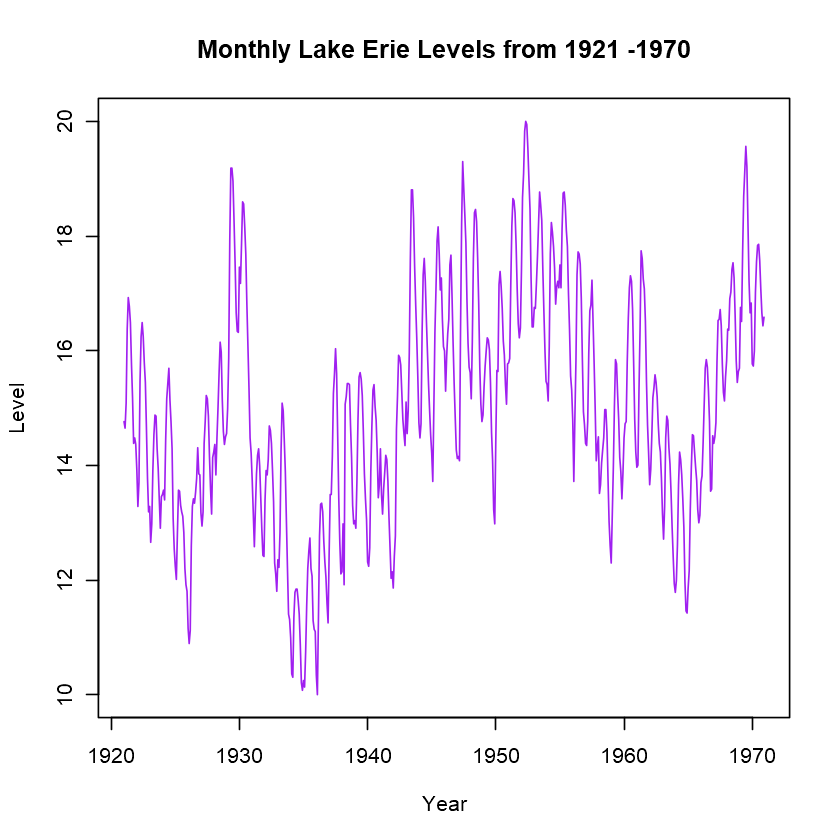

In [16]:
# plot time series
plot(data, main='Monthly Lake Erie Levels from 1921 -1970', xlab='Year', ylab='Level', lwd=1, col='purple')

To see the trend and seasonlity of the plot more clearly we will use the decompose () function to break it down. We can clearly see that there is a trend in this data along with seasonlity; and we don't have variance as seen from the raw data plot above.  We added the decompose() argument 'additive' because our variance is independent of the level. 

For info and practice on additive and multiplicative seasonality 
http://kourentzes.com/forecasting/2014/11/09/additive-and-multiplicative-seasonality/

In [17]:
data.decomp <- decompose(data, 'additive')

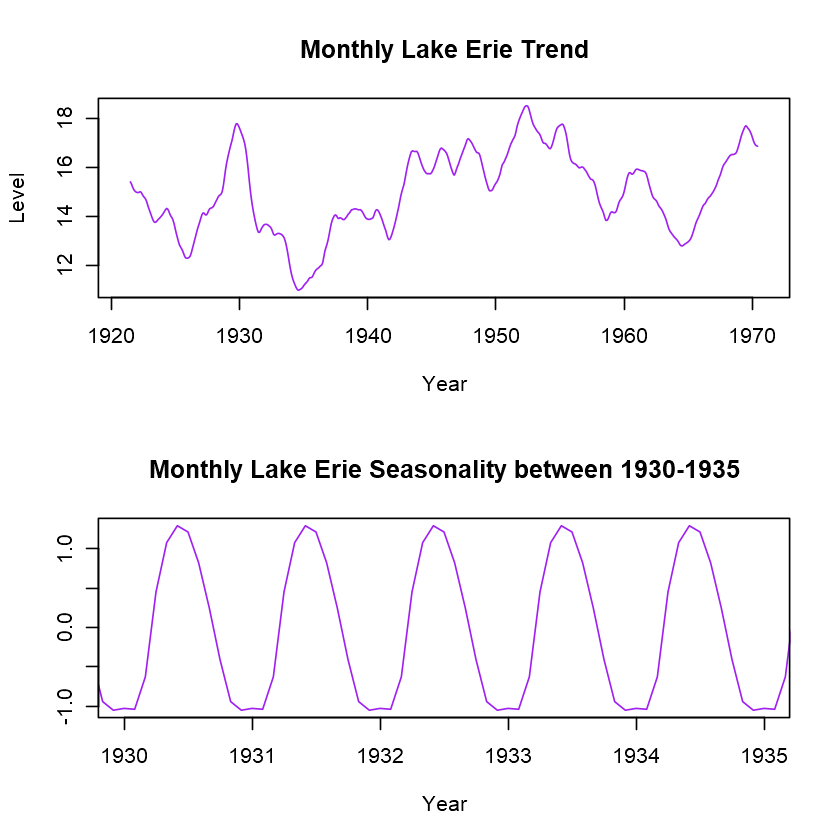

In [18]:
par(mfrow=c(2,1))
plot(data.decomp$trend, main='Monthly Lake Erie Trend', ylab='Level', xlab='Year', col='purple')
plot(data.decomp$season, main='Monthly Lake Erie Seasonality between 1930-1935', 
     ylab='', xlab='Year',xlim=c(1930,1935), col='purple')

The plots below are an alternative way of seeing the seasonality in the raw data. The Auto Correlation Function plot, ACF, clearly shows strong seasonlity patterns. In the second plot below, the trend was removed from the data and zoomed in on a fixed time period from 1930-1935. Lake Erie's level dips around Oct-Nov every year showing seasonality. 

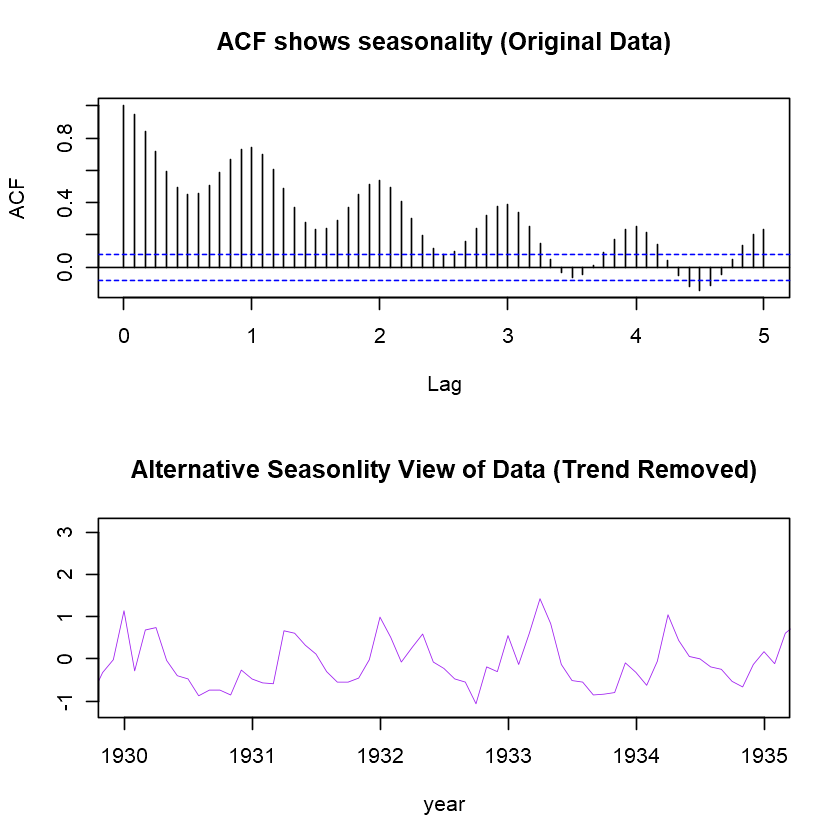

In [19]:
par(mfrow=c(2,1))
acf(data, 60, main='ACF shows seasonality (Original Data)') # add the argument "plot=F" to see the values
plot(diff(data), main='Alternative Seasonlity View of Data (Trend Removed)', 
     lwd=0.5, xlab='year', ylab='', col='purple', xlim=c(1930,1935))

# 3. HoltWinters Forecasting
## Smoothing Breakdown

Now that we know that trend and seasonlity are in the Lake Erie time series, we can use the Holt-Winters function in the forecasts library to do some breakdowns, plot, and make forecasts into the future.

The Holt-Winters forecast can be broken down into smoothing level, trend, and season.

- m = length of the season in the data
- h = number of steps in the future forecast
- n = length of data

#### 1. Smooth level
level<sub>n</sub> = α(x<sub>n</sub> - seasonal<sub>n-m</sub>) + (1-α)(level<sub>n-1</sub>+trend<sub>n-1</sub>)


#### 2. Smooth the Trend
trend<sub>n</sub> = ß x (level<sub>n</sub> - level<sub>n-1</sub>) + (1-ß) x trend<sub>n-1</sub>
    

#### 3. Smooth the Season
seasonal<sub>n</sub> = Γ x (x<sub>n</sub> - level<sub>n</sub>) + (1-Γ) x seasonal<sub>n-m</sub>

#### 4. Update the Forecast
###### For addiditive seasonality we use

xhat<sub>n+h</sub> = level<sub>n</sub> + h x trend<sub>n</sub> + seasonal<sub>n+h-m</sub>

###### For multiplicative seasonality we use

xhat<sub>n+h</sub> = (level<sub>n</sub> + h x trend<sub>n</sub>) x seasonal<sub>n+h-m</sub>

The HoltWinters() function is used to quickly get the α, ß, and Γ values.

In [20]:
# not putting any HoltWinters arguments worked best for this problem
data.hw <- HoltWinters(data, seasonal='additive')
# data.hw <- HoltWinters(data, seasonal='additive', alpha=T, beta=T, gamma=T)
# did not work well when comparing the $SSE values.
data.hw

Holt-Winters exponential smoothing with trend and additive seasonal component.

Call:
HoltWinters(x = data, seasonal = "additive")

Smoothing parameters:
 alpha: 0.8964884
 beta : 0.002994526
 gamma: 1

Coefficients:
            [,1]
a   17.410605135
b    0.000106565
s1  -1.038852235
s2  -0.760603921
s3  -0.393821977
s4   0.620686327
s5   1.192268824
s6   1.334934461
s7   1.268369424
s8   0.915921262
s9   0.320090569
s10 -0.377915157
s11 -0.794698187
s12 -0.826605135

Furthermore, we can plot Holt-Winters results which in our case shows very good smoothing results (red line). 

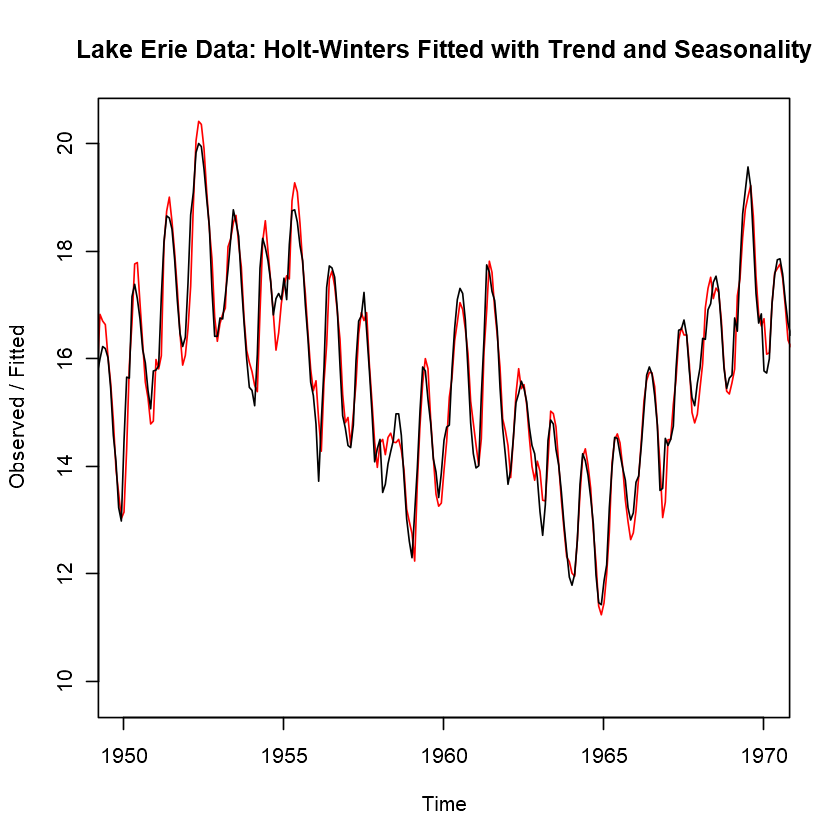

In [21]:
plot(data.hw, xlim=c(1950,1970), 
     main='Lake Erie Data: Holt-Winters Fitted with Trend and Seasonality')

## Forecasting for April 1972

To update the forecasts we do not actually need α, ß, and Γ values. Instead, we use the coefficients values from the HoltWinters() function for updating the forecast formula and then choose among the seasonal values.

In [22]:
data.hw$coefficients

a            b           s1           s2           s3           s4 
17.410605135  0.000106565 -1.038852235 -0.760603921 -0.393821977  0.620686327 
          s5           s6           s7           s8           s9          s10 
 1.192268824  1.334934461  1.268369424  0.915921262  0.320090569 -0.377915157 
         s11          s12 
-0.794698187 -0.826605135

As a reminder, the Lake Erie dataset is additive so we use the additive updating forecast formula. The values a and b from the coefficients above represent level and trend; respectively.

### xhat<sub>n+h</sub> = level<sub>n</sub> + h x trend<sub>n</sub> + seasonal<sub>n+h-m</sub>

- n=600;    num. of datapoints  length(data)
- h=16; 16 steps forward in the future; April 1972
- m=12;  length of season in dataset

xhat<sub>600+16</sub> = level<sub>600</sub> + 16 x trend<sub>600</sub> + seasonal<sub>600+16-12</sub>

xhat<sub>600+16</sub> = 17.410<sub>600</sub> + 16 x 0.000107<sub>600</sub> + 0.6207<sub>600+16-12</sub>

xhat<sub>600+16</sub> = 18.032


The Forecast values, for April 1972, produced by the Holt-Winter function was 18.033 which is very similar compared to our calculated updated forecast value 18.032. The forecast() function of the Holt-Winters data also shows different confidence intervals values of 80% and 95%. In addition, these values can also be plotted. The dark shaded area is 80% confidence interval and the lighter shaded area is 95% confidence interval. The default forecast is 2 years ahead and can be changed using the h argument.

In [23]:
forecast(data.hw)

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 1971       16.37186 15.79119 16.95253 15.48380 17.25992
Feb 1971       16.65021 15.86932 17.43111 15.45594 17.84449
Mar 1971       17.01710 16.07687 17.95734 15.57914 18.45507
Apr 1971       18.03172 16.95472 19.10871 16.38459 19.67884
May 1971       18.60341 17.40447 19.80234 16.76980 20.43702
Jun 1971       18.74618 17.43599 20.05637 16.74241 20.74995
Jul 1971       18.67972 17.26642 20.09302 16.51826 20.84118
Aug 1971       18.32738 16.81745 19.83731 16.01814 20.63662
Sep 1971       17.73165 16.13040 19.33291 15.28275 20.18056
Oct 1971       17.03376 15.34562 18.72189 14.45197 19.61554
Nov 1971       16.61708 14.84584 18.38831 13.90821 19.32595
Dec 1971       16.58528 14.73422 18.43633 13.75433 19.41622
Jan 1972       16.37314 14.42746 18.31882 13.39748 19.34880
Feb 1972       16.65149 14.63205 18.67094 13.56302 19.73997
Mar 1972       17.01838 14.92737 19.10940 13.82045 20.21631
Apr 1972       18.03300 15.87239 20.1936

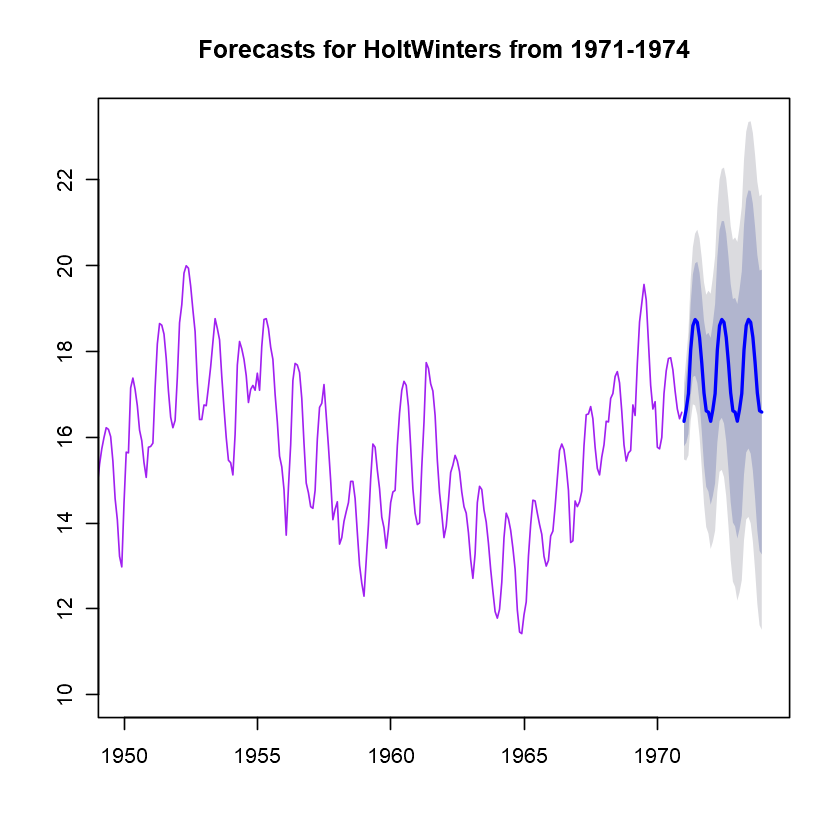

In [24]:
plot(forecast(data.hw, h=36), col='purple', xlim=c(1950, 1974),main='Forecasts for HoltWinters from 1971-1974')